In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl

from datetime import datetime, timezone, timedelta
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import platform

system = platform.system()

if system == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
else:
    !apt-get -y install fonts-nanum
    !fc-cache -fv
    !rm ~/.cache/matplotlib -rf

    plt.rcParams['font.family'] = 'NanumBarunGothic'

In [2]:
analysisdata = pd.read_json('../data/review_count_alltime.json')

In [26]:
df_user = pd.read_csv('../data/chart.csv')

In [3]:
analysisdata

,success,results,count_all_reviews,expand_graph
start_date,1,1672012800,True,False
end_date,1,1715472000,True,False
weeks,1,[],True,False
rollups,1,"[{'date': 1672012800, 'recommendations_up': 50...",True,False
rollup_type,1,week,True,False
recent,1,"[{'date': 1712966400, 'recommendations_up': 0,...",True,False


## 리뷰 카운트

In [17]:
df_recommend = pd.DataFrame(analysisdata['results']['rollups'])

In [18]:
df_recommend['date'] = pd.to_datetime(df_recommend['date'],unit='s')

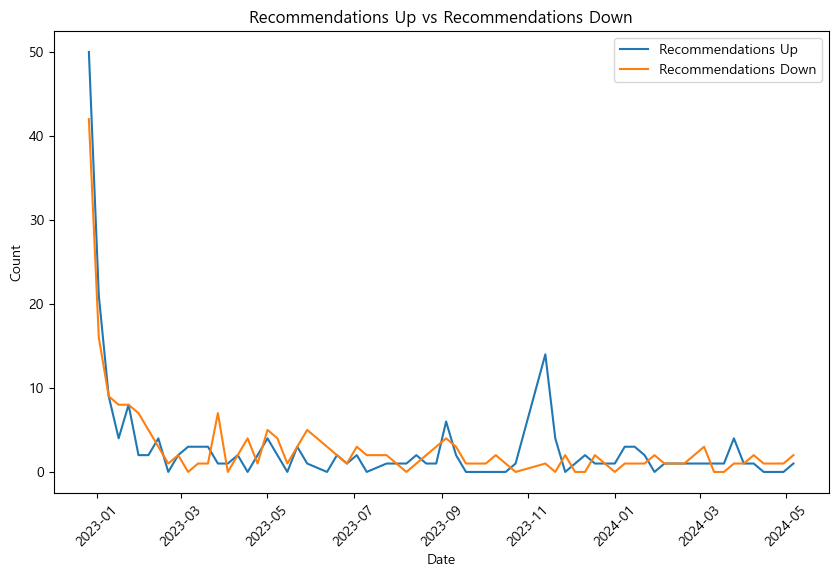

In [25]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_recommend, x='date', y='recommendations_up', label='Recommendations Up')
sns.lineplot(data=df_recommend, x='date', y='recommendations_down', label='Recommendations Down')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Recommendations Up vs Recommendations Down')
plt.legend()
plt.xticks(rotation=45)
plt.show()

## 유저 수

In [52]:
df_user['DateTime'] = pd.to_datetime(df_user['DateTime'])

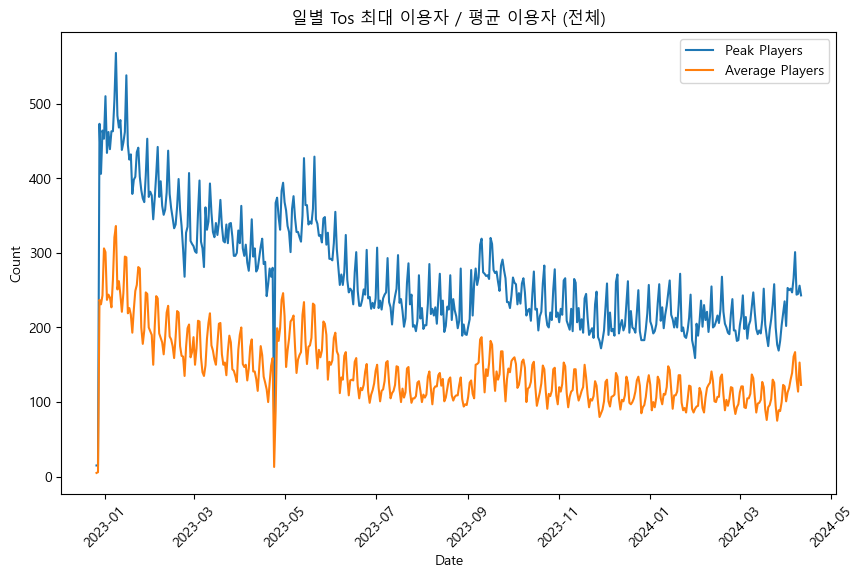

In [59]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_user.query('DateTime < "2024-04-12"'), x='DateTime', y='Players', label='Peak Players')
sns.lineplot(data=df_user.query('DateTime < "2024-04-12"'), x='DateTime', y='Average Players', label='Average Players')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('일별 Tos 최대 이용자 / 평균 이용자 (전체)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

- 2024-04-12 부터 1시간씩 있음
- 2024-05-06 부터 10분씩 있음

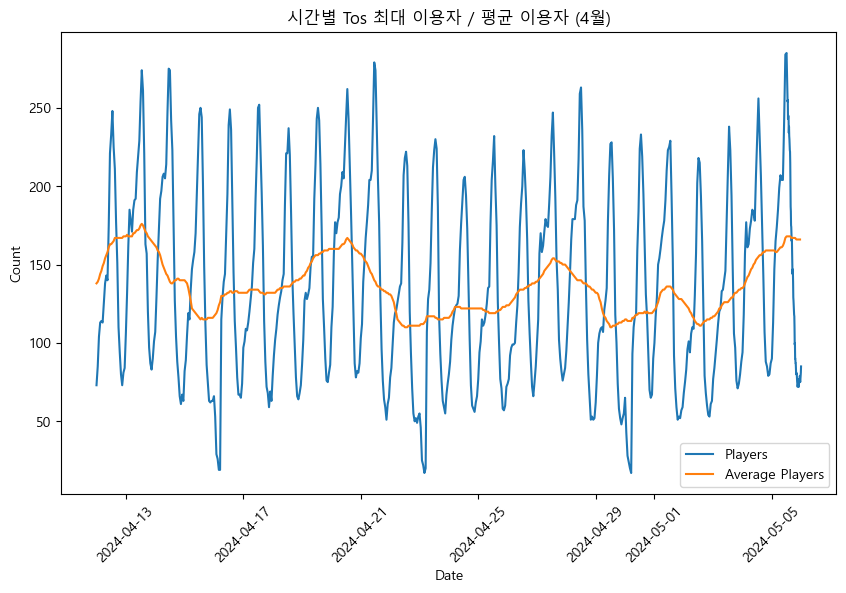

In [62]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_user.query('DateTime >= "2024-04-12" & DateTime < "2024-05-06"'), x='DateTime', y='Players', label='Players')
sns.lineplot(data=df_user.query('DateTime >= "2024-04-12" & DateTime < "2024-05-06"'), x='DateTime', y='Average Players', label='Average Players')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('시간별 Tos 최대 이용자 / 평균 이용자 (4월)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

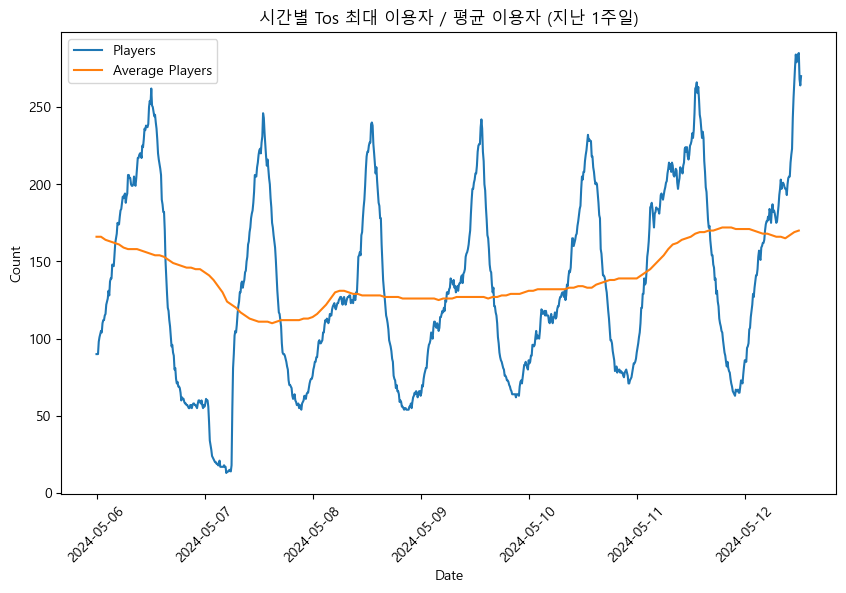

In [61]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_user.query('DateTime >= "2024-05-06"'), x='DateTime', y='Players', label='Players')
sns.lineplot(data=df_user.query('DateTime >= "2024-05-06"'), x='DateTime', y='Average Players', label='Average Players')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('시간별 Tos 최대 이용자 / 평균 이용자 (지난 1주일)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

### 평균 가격

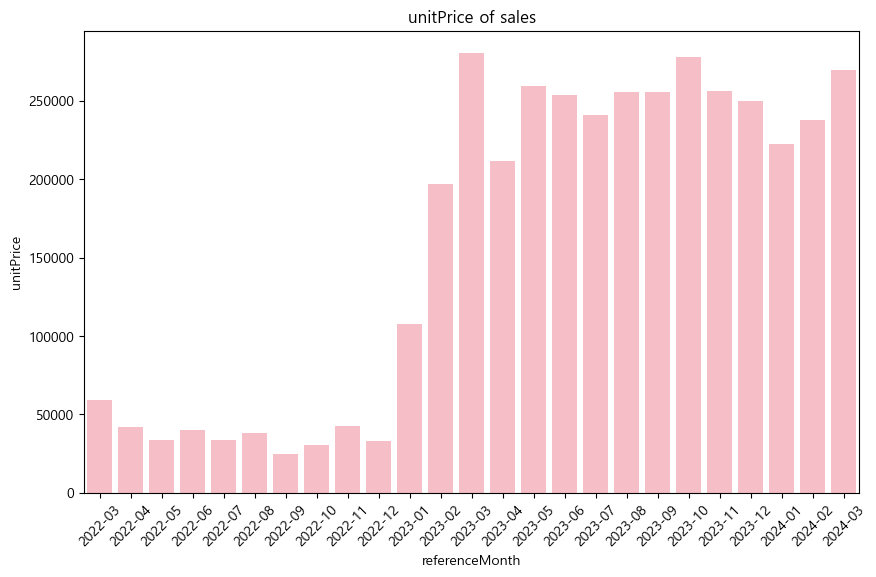

In [10]:
plt.figure(figsize=(10, 6))

sns.barplot(data=df_salesBasic.query('referenceMonth >= "2022-03"'), x='referenceMonth', y='unitPrice',color='lightpink')

plt.title('unitPrice of sales')
plt.xticks(rotation=45)
plt.show()

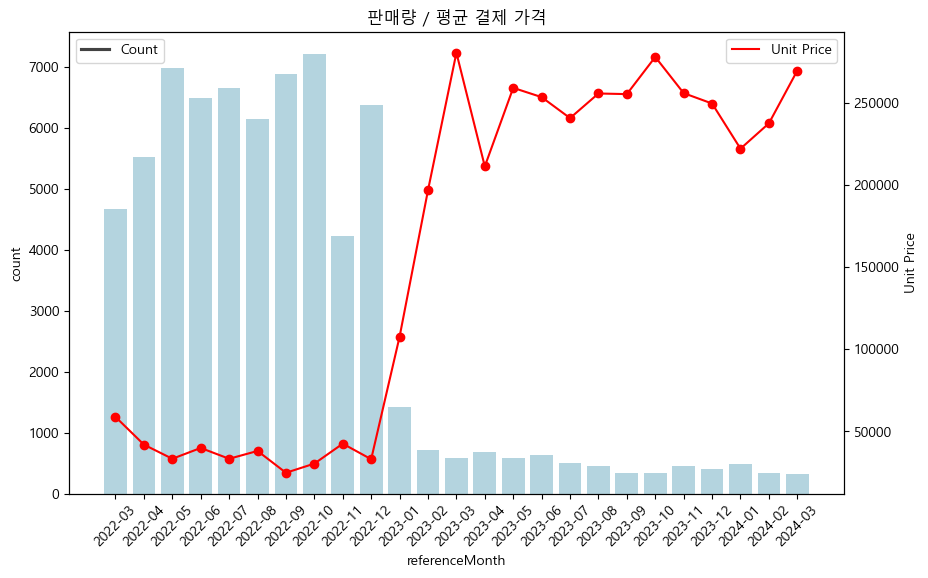

In [39]:
# figure와 axes 생성
fig, ax1 = plt.subplots(figsize=(10, 6))

# 첫 번째 그래프 (바플롯)
sns.barplot(data=df_salesBasic.query('referenceMonth >= "2022-03"'), x='referenceMonth', y='count', color='lightblue', ax=ax1)
ax1.set_title('판매량 / 평균 결제 가격')

# x축 라벨 회전
ax1.tick_params(axis='x', rotation=45)

# 두 번째 그래프 (라인플롯)
ax2 = ax1.twinx()
sns.lineplot(data=df_salesBasic.query('referenceMonth >= "2022-03"'), x='referenceMonth', y='unitPrice', color='red', ax=ax2)
plt.scatter(x=df_salesBasic.query('referenceMonth >= "2022-03"')['referenceMonth'], y=df_salesBasic.query('referenceMonth >= "2022-03"')['unitPrice'], color='red', marker='o')
ax2.set_ylabel('Unit Price')

# 범례 추가
ax1.legend(['Count'], loc='upper left')
ax2.legend(['Unit Price'], loc='upper right')

plt.show()

### 매출

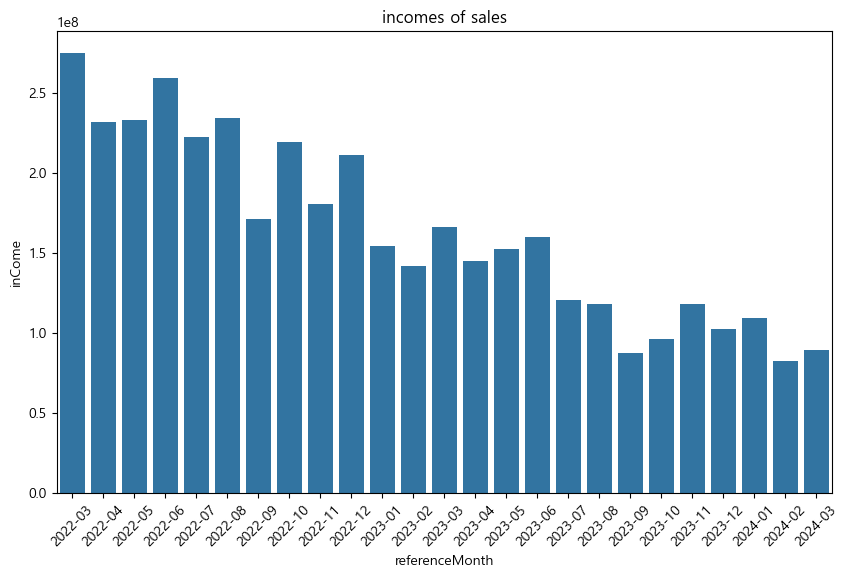

In [12]:
plt.figure(figsize=(10, 6))

sns.barplot(data=df_salesBasic.query('referenceMonth >= "2022-03"'), x='referenceMonth', y='inCome')

plt.title('incomes of sales')
plt.xticks(rotation=45)
plt.show()

## 재구매율

In [13]:
df_salesPeriod = pd.DataFrame(analysisdata['data']['customerSales']['salesPeriod'])

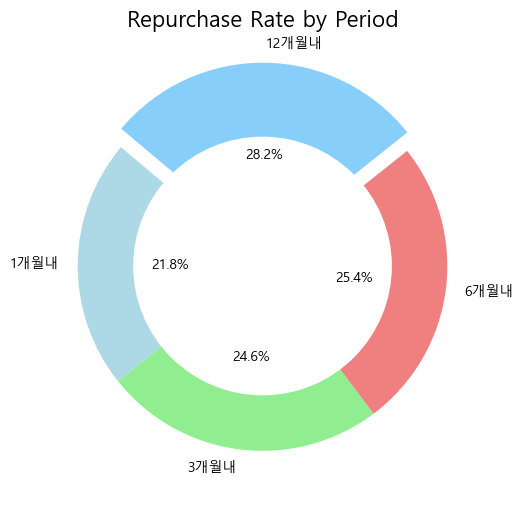

In [14]:

# 데이터
sizes = df_salesPeriod['repurchaseRate']
labels = df_salesPeriod['period']
explode = (0, 0, 0, 0.1)  # 특정 부분을 강조하기 위해 폭발 효과 사용

# 원 그래프 그리기
plt.figure(figsize=(8, 6))
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue']
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=140,pctdistance=0.5, colors=colors)

# 중심에 원을 그려서 원 그래프가 원 모양을 유지하도록 함
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# 제목 추가
plt.title('Repurchase Rate by Period', fontsize=16)

# 그래프 보이기
plt.show()

In [15]:
df_salesPeriod['avgPurchaseRate']

0    1.0
1    2.5
2    4.4
3    7.2
Name: avgPurchaseRate, dtype: float64

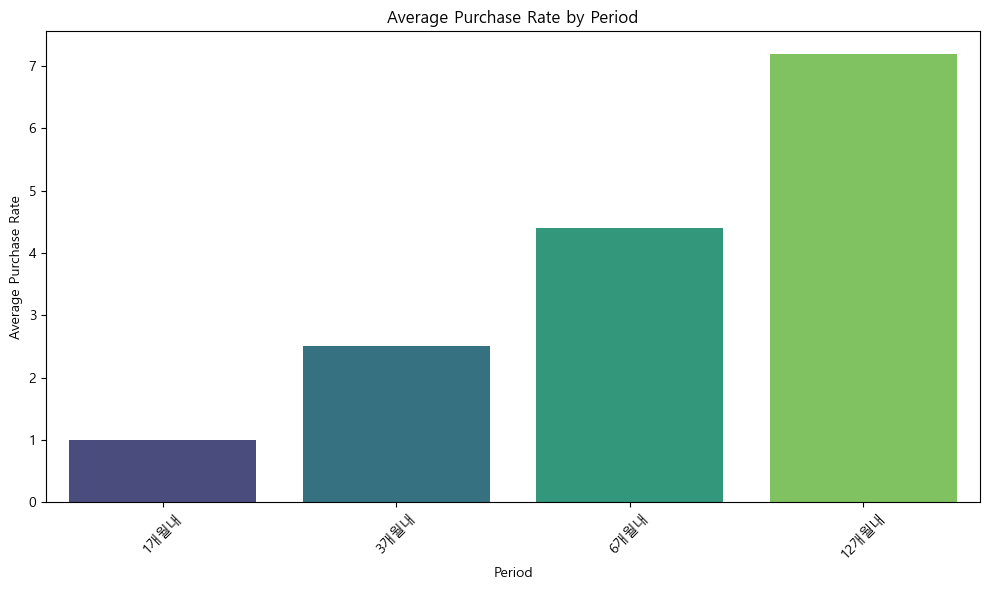

In [16]:
plt.figure(figsize=(10, 6))

sns.barplot(data=df_salesPeriod, x='period', y='avgPurchaseRate', palette='viridis')

plt.title('Average Purchase Rate by Period')
plt.xlabel('Period')
plt.ylabel('Average Purchase Rate')

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


## 소비자 유형

In [17]:
df_salesPerson = pd.DataFrame(analysisdata['data']['customerType']['salesPerson'])
df_salesFamily = pd.DataFrame(analysisdata['data']['customerType']['salesFamily'])
df_salesIncome = pd.DataFrame(analysisdata['data']['customerType']['salesIncome'])

### 성별 및 연령

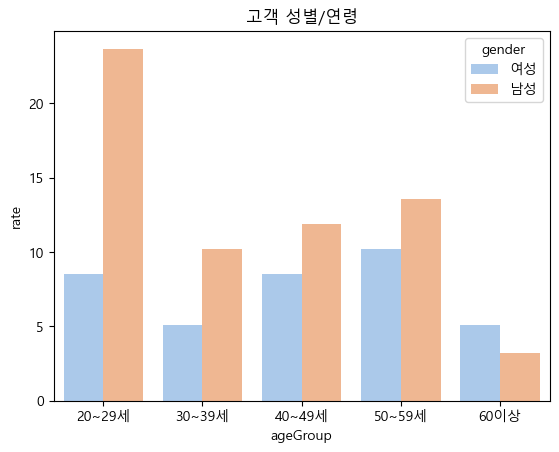

In [18]:
orders = ['20~29세','30~39세','40~49세','50~59세','60이상']

sns.barplot(data=df_salesPerson, x='ageGroup', y='rate', hue='gender', palette='pastel',order=orders)

plt.title('고객 성별/연령')
plt.show()

### 가족구성 및 소득

In [19]:
df_salesIncome

,type,rate
0,2000만원이하,1.7
1,3000만원이하,24.2
2,4000만원이하,10.3
3,5000만원이하,24.1
4,6000만원이하,13.8
5,8000만원이하,12.1
6,1억원이하,5.2
7,1억원초과,8.6


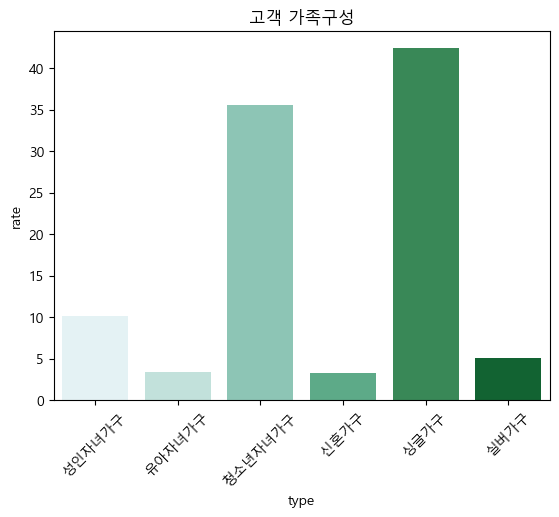

In [20]:
sns.barplot(data=df_salesFamily, x='type', y='rate', palette='BuGn')

plt.xticks(rotation=45)
plt.title('고객 가족구성')
plt.show()


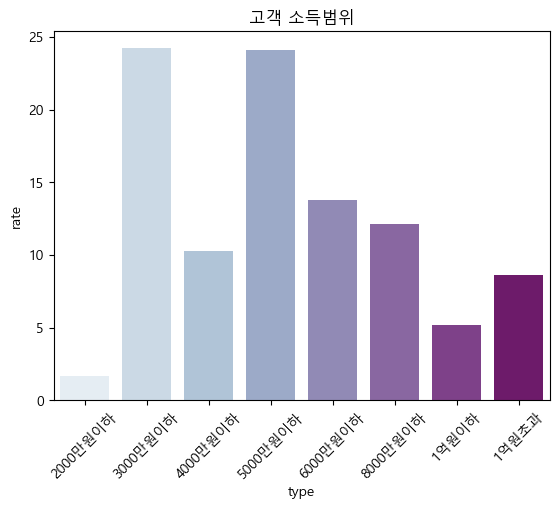

In [21]:
sns.barplot(data=df_salesIncome, x='type', y='rate',palette='BuPu')

plt.xticks(rotation=45)
plt.title('고객 소득범위')
plt.show()
